# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

* 10 variables :Attribute Information:
* Tenemos las features de nuestros pacientes, mientras que en la target tenemos la variable cuantitativa de diabetes
* 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [7]:
X = diabetes['data']

In [8]:
# datos
print(X.shape)
print(X.size)
print(X.ndim)

(442, 10)
4420
2


In [9]:
y = diabetes['target']

In [16]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [17]:
# target
shape
size
ndim

(442,)
442
1


In [18]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [10]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [11]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [12]:
# Forma 1
diabetes_data_train = X[:400]
diabetes_data_test = X[400:]

diabetes_target_train = y[:400]
diabetes_target_test = y[400:]


In [13]:
# Forma 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [15]:
# Pasar array a dataframe
df = pd.DataFrame(diabetes['data'])
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [17]:
from scipy import stats

In [18]:
# Skew y Kurtosis
print(stats.kurtosis(y))
print(stats.skew(y))

-0.8866436055681386
0.43906639932477265


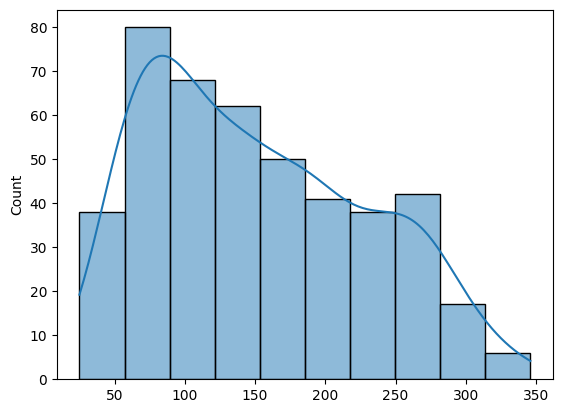

In [19]:
import seaborn as sns
sns.histplot(data=y,kde=True);

<Axes: >

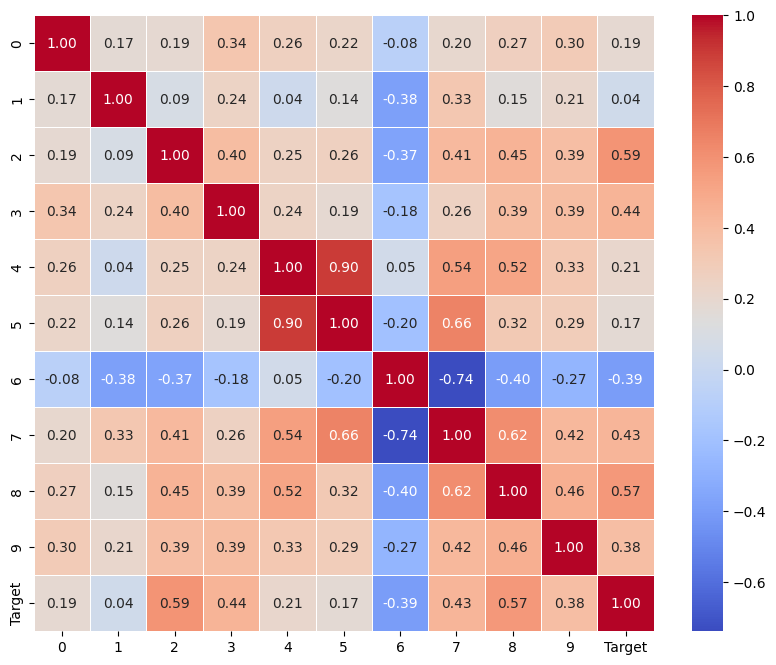

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Target'] = y
corr_matrix = df.select_dtypes('number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [21]:
diabetes_model.fit(X_train,y=y_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...
7.43e+02 = 7.43*^10^2 = 743

In [22]:
coeff_df = pd.DataFrame(diabetes_model.coef_,columns=['Coeff'])

In [23]:
coeff_df

,Coeff
0,37.904021
1,-241.964362
2,542.428759
3,347.703844
4,-931.488846
5,518.062277
6,163.419983
7,275.317902
8,736.198859
9,48.670657


In [24]:
intercept = diabetes_model.intercept_
intercept

np.float64(151.34560453985995)

In [25]:
predictions = diabetes_model.predict(X_test)
predictions

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

#### Print your `diabetes_target_test` and compare with the prediction. 

In [26]:
print(y_test)

[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error

print("MAE: ", mean_absolute_error(y_test,predictions))
print("MAPE: ", mean_absolute_percentage_error(y_test,predictions))
print("MSE: ", mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,predictions)))

MAE:  42.79409467959994
MAPE:  0.3749982636756112
MSE:  2900.19362849348
RMSE:  53.853445836765914


#### Is `diabetes_target_test` exactly the same as the model prediction?

In [28]:
df_errors = pd.DataFrame({'Predicciones':predictions,'Real':y_test})
df_errors['diff'] =  df_errors['Real'] - df_errors['Predicciones']
df_errors

,Predicciones,Real,diff
0,139.547558,219.0,79.452442
1,179.517208,70.0,-109.517208
2,134.038756,202.0,67.961244
3,291.417029,230.0,-61.417029
4,123.789659,111.0,-12.789659
...,...,...,...
84,115.011800,153.0,37.988200
85,78.955842,98.0,19.044158
86,81.560873,37.0,-44.560873
87,54.379973,63.0,8.620027


#### Which are the most important features?

In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer
std_ssc = StandardScaler()
min_esc = MinMaxScaler()
rob_esc = RobustScaler()
pw_tra = PowerTransformer()


standar = std_ssc.fit_transform(y)
min = min_esc.fit_transform(y)
rob = rob_esc.fit_transform(y)
pw = pw_tra.fit_transform(y)


ValueError: Expected 2D array, got 1D array instead:
array=[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 129. 142.  90. 158.  39. 196. 222. 277.  99. 196. 202. 155.  77.
 191.  70.  73.  49.  65. 263. 248. 296. 214. 185.  78.  93. 252. 150.
  77. 208.  77. 108. 160.  53. 220. 154. 259.  90. 246. 124.  67.  72.
 257. 262. 275. 177.  71.  47. 187. 125.  78.  51. 258. 215. 303. 243.
  91. 150. 310. 153. 346.  63.  89.  50.  39. 103. 308. 116. 145.  74.
  45. 115. 264.  87. 202. 127. 182. 241.  66.  94. 283.  64. 102. 200.
 265.  94. 230. 181. 156. 233.  60. 219.  80.  68. 332. 248.  84. 200.
  55.  85.  89.  31. 129.  83. 275.  65. 198. 236. 253. 124.  44. 172.
 114. 142. 109. 180. 144. 163. 147.  97. 220. 190. 109. 191. 122. 230.
 242. 248. 249. 192. 131. 237.  78. 135. 244. 199. 270. 164.  72.  96.
 306.  91. 214.  95. 216. 263. 178. 113. 200. 139. 139.  88. 148.  88.
 243.  71.  77. 109. 272.  60.  54. 221.  90. 311. 281. 182. 321.  58.
 262. 206. 233. 242. 123. 167.  63. 197.  71. 168. 140. 217. 121. 235.
 245.  40.  52. 104. 132.  88.  69. 219.  72. 201. 110.  51. 277.  63.
 118.  69. 273. 258.  43. 198. 242. 232. 175.  93. 168. 275. 293. 281.
  72. 140. 189. 181. 209. 136. 261. 113. 131. 174. 257.  55.  84.  42.
 146. 212. 233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.
  49.  64.  48. 178. 104. 132. 220.  57.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
coeff_df = pd.DataFrame(diabetes_model.coef_,
                        diabetes['feature_names'],
                        columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
s5,736.198859
bmi,542.428759
s2,518.062277
bp,347.703844
s4,275.317902
s3,163.419983
s6,48.670657
age,37.904021
sex,-241.964362
s1,-931.488846


In [34]:
# predictions = diabetes_model.predict()

In [79]:
predictions

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [80]:
print("MAE: ", mean_absolute_error())
print("MAPE: ", mean_absolute_percentage_error())
print("MSE: ", mean_squared_error())
print("RMSE: ", np.sqrt(mean_squared_error()))

MAE:  36.610175567158855
MAPE:  0.3930935133924728
MSE:  2004.5676026898218
RMSE:  44.772397776864956


#### Iteramos con un nuevo modelo para comprobar si podemos mejorar el anterior

In [81]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


<AxesSubplot:>

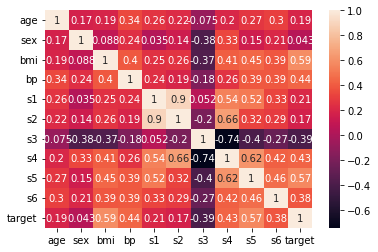

In [82]:
sns.heatmap()

In [99]:
y = 
X = 


In [100]:
X

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [101]:
# Forma 2
from sklearn.model_selection import train_test_split


In [102]:
diabetes_model = LinearRegression()


MAE:  36.98866121154863
MAPE:  0.3951211127246971
MSE:  2126.925354809974
RMSE:  46.118600963277


In [103]:
diabetes_model.score()

0.49525237109217857